#                                                                                     Lab n°2

## Data Import

In [44]:
# Library import
from datasets import load_dataset
from string import punctuation
from heapq import nlargest
import re
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Dataset used for this lab
train_dataset = load_dataset("imdb", split="train").to_pandas()
test_dataset = load_dataset("imdb", split="test").to_pandas()
Accuracy = [] # list of all accuracy
Names = [] #List of names

Reusing dataset imdb (C:\Users\PION\.cache\huggingface\datasets\imdb\plain_text\1.0.0\e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)
Reusing dataset imdb (C:\Users\PION\.cache\huggingface\datasets\imdb\plain_text\1.0.0\e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


1) How many splits does the dataset has? (1 point)

The Dataset has 3 split, a train split, a test split and a split containing unlabelized image

2) How big are these splits? (1 point)

The train split has 25000 reviews, the unsupervised split has 50000 reviews and the test split has 25000 reviews.
Since the unsupervised split is irrelevant we didn't downloaded it

3) What is the proportion of each class on the supervised splits? (1 point)

There is a 50/50 repartition between positive reviews (i.e 1) and negative reviews (i.e 0) in both supervised splits. For each splits and each class there are 12500 reviews.

In [3]:
train_dataset.groupby('label').count()

,text
label,
0,12500
1,12500


In [4]:
test_dataset.groupby('label').count()

,text
label,
0,12500
1,12500


## Pre treatment

1. (2 points) Take a look at the data and create an adapted preprocessing function which at least

NB : The next portion of code can take some time to run 

In [6]:
def pre_treatment(data):
    '''Clean the dataset (lowercase, remove punctuation and stopwords) and apply steamming
    Args:
        data : The datatset
    '''
    stops = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    re_word = re.compile(r"^\w+$")
    data['text'] = data['text'].str.lower()
    data['text'] = data['text'].str.replace("<br/>","")
    data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')
    data['text_no_stop'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
    data['text_steam'] = data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if re_word.match(word)]))
    data['text_steam_stop_word'] = data['text_no_stop'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if re_word.match(word)])) #to test both
pre_treatment(test_dataset)
pre_treatment(train_dataset)

C:\Users\PION\AppData\Local\Temp\ipykernel_19144\2588687814.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')
C:\Users\PION\AppData\Local\Temp\ipykernel_19144\2588687814.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')


## Creation of our model

Importation of library for our model

In [7]:
#Creating our model
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer is capable of doing both word count vectorization and IDF calculations.
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

2. (4 points) Implement and train a naive Bayes classifier on the training data

In [8]:
text_pip = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB()) ])

In [9]:
def prediction(data,col):
    """compute the prediction and show the confusion matrix
    Args:
        data: The Dataset
        col: The column to use for our prediction
    Return:
        The list of predictions that will be used to calculate the accuracy
    """
    text_pip.fit(train_dataset[col],train_dataset['label'])
    pred = text_pip.predict(data[col])
    metrics.plot_confusion_matrix(text_pip,data[col],data['label'])
    plt.show()
    return pred

C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


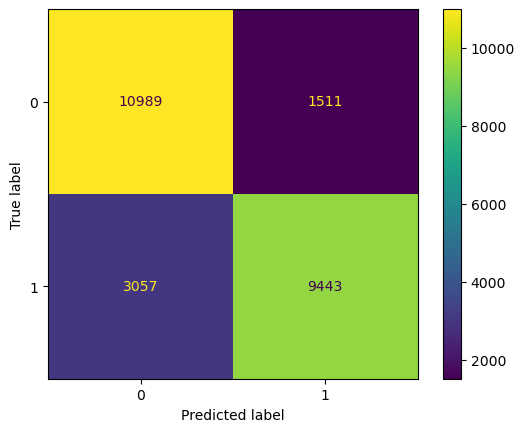

In [10]:
pred_test = prediction(test_dataset,'text')

C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


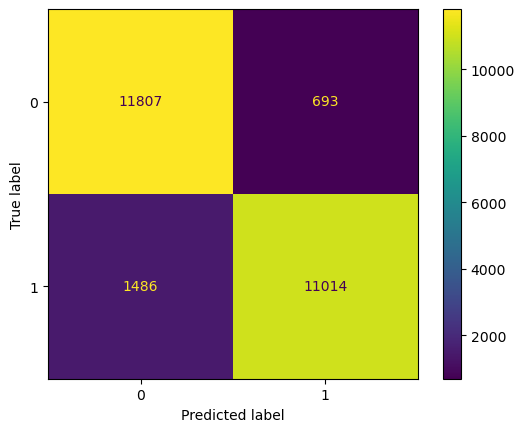

In [11]:
pred_train =  prediction(train_dataset,'text')

3. (1 point) Report the accuracy on both training and test set ?

In [12]:
print('Accuracy is ' + str(np.mean(pred_test == test_dataset.label)))
Accuracy.append(str(np.mean(pred_test == test_dataset.label)))
Names.append('test')
print('Accuracy is ' + str(np.mean(pred_train == train_dataset.label)))
Accuracy.append(str(np.mean(pred_train == train_dataset.label)))
Names.append('train')

Accuracy is 0.81728
Accuracy is 0.91284


4. (1 point) Why is accuracy a sufficient measure of evaluation here?

The accuracy is a good measure in our case since our dataset is well balanced. Each type of label has a similar amount of data allowing a better representation

5. [Bonus] What are the top 10 most important words (features) for each class?

## Most important word

In [13]:
def most_important_word():
    """ Show the words that have the most impact
    """
    wordscount = text_pip[0].get_feature_names()
    importance = text_pip[1].feature_log_prob_
    nb=10
    nmax = nlargest(nb, enumerate(importance[0]), key=lambda x:x[1])
    i=0
    while i < nb:
        print(wordscount[nmax[i][0]])
        i = i+1
most_important_word()

the
and
of
to
is
in
this
it
that
br


C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The most important words are useless small words. To resolve this problem we will remove them from every text.

## Removing of the stops words

This part has been added in the preprocessing part with the column "text_no_stop"

In [14]:
train_dataset

,text,label,text_no_stop,text_steam,text_steam_stop_word
0,bromwell high is a cartoon comedy it ran at th...,1,bromwell high cartoon comedy ran time programs...,bromwel high is a cartoon comedi it ran at the...,bromwel high cartoon comedi ran time program s...
1,homelessness or houselessness as george carlin...,1,homelessness houselessness george carlin state...,homeless or houseless as georg carlin state ha...,homeless houseless georg carlin state issu yea...
2,brilliant overacting by lesley ann warren best...,1,brilliant overacting lesley ann warren best dr...,brilliant overact by lesley ann warren best dr...,brilliant overact lesley ann warren best drama...
3,this is easily the most underrated film inn th...,1,easily underrated film inn brooks cannon sure ...,this is easili the most underr film inn the br...,easili underr film inn brook cannon sure flaw ...
4,this is not the typical mel brooks film it was...,1,typical mel brooks film much less slapstick mo...,this is not the typic mel brook film it was mu...,typic mel brook film much less slapstick movi ...
...,...,...,...,...,...
24995,towards the end of the movie i felt it was too...,0,towards end movie felt technical felt like cla...,toward the end of the movi i felt it was too t...,toward end movi felt technic felt like classro...
24996,this is the kind of movie that my enemies cont...,0,kind movie enemies content watch time bloody t...,this is the kind of movi that my enemi content...,kind movi enemi content watch time bloodi true...
24997,i saw descent last night at the stockholm film...,0,saw descent last night stockholm film festival...,i saw descent last night at the stockholm film...,saw descent last night stockholm film festiv o...
24998,some films that you pick up for a pound turn o...,0,films pick pound turn rather good 23rd century...,some film that you pick up for a pound turn ou...,film pick pound turn rather good 23rd centuri ...


C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


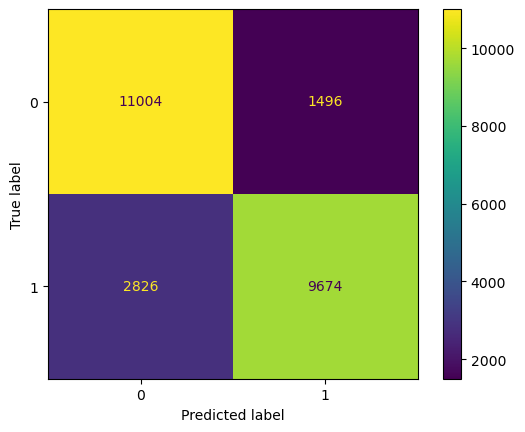

In [15]:
pred_no = prediction(test_dataset,'text_no_stop')

In [16]:
print('Accuracy is ' + str(np.mean(pred_no == test_dataset.label)))
Accuracy.append(str(np.mean(pred_no == test_dataset.label)))
Names.append('no_stop')

Accuracy is 0.82712


In [17]:
most_important_word()

br
movie
film
one
like
even
good
bad
would
really


C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


question 6

In [47]:
def get_index(prediction):
    """Description
    Args:
        prediction: Series containing a binary prediction
    Return:
        res: List of elements that were not guessed correctly
    """
    columns = ['pred','label']
    df = pd.DataFrame(list(zip(prediction,test_dataset.label)),columns=columns)
    res = []
    for index,row in df.iterrows():
        if row["pred"] != row["label"]:
            res.append(index)
    return res

In [50]:
incorrect = get_index(pred_test)
for i in range(5):
    if i<len(incorrect):
        print(test_dataset.text[incorrect[i]])
        print("\n ------------------------------\n")

i loved this movie from beginning to endi am a musician and i let drugs get in the way of my some of the things i used to loveskateboardingdrawing but my friends were always there for memusic was like my rehablife supportand my drugit changed my lifei can totally relate to this movie and i wish there was more i could saythis movie left me speechless to be honesti just saw it on the ifc channeli usually hate having satellite but this was a perk of having satellitethe ifc channel shows some really great movies and without it i never would have found this movieim not a big fan of the international films because i find that a lot of the dont do a very good job on translating linesi mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guessi almost never got to see this amazing moviegood thing i stayed up for it instead of going to bedwell earlier than usualloli hope you all enjoy the hell of this movie and love this movie 

## Adding some steaming

1. (2 points) Add stemming or lemmatization to your pretreatment.

Steaming has been added in the pretreatment function

In [18]:
test_dataset

,text,label,text_no_stop,text_steam,text_steam_stop_word
0,i went and saw this movie last night after bei...,1,went saw movie last night coaxed friends mine ...,i went and saw this movi last night after be c...,went saw movi last night coax friend mine ill ...
1,actor turned director bill paxton follows up h...,1,actor turned director bill paxton follows prom...,actor turn director bill paxton follow up his ...,actor turn director bill paxton follow promis ...
2,as a recreational golfer with some knowledge o...,1,recreational golfer knowledge sports history p...,as a recreat golfer with some knowledg of the ...,recreat golfer knowledg sport histori pleas di...
3,i saw this film in a sneak preview and it is d...,1,saw film sneak preview delightful cinematograp...,i saw this film in a sneak preview and it is d...,saw film sneak preview delight cinematographi ...
4,bill paxton has taken the true story of the 19...,1,bill paxton taken true story 1913 us golf open...,bill paxton has taken the true stori of the 19...,bill paxton taken true stori 1913 us golf open...
...,...,...,...,...,...
24995,i occasionally let my kids watch this garbage ...,0,occasionally let kids watch garbage understand...,i occasion let my kid watch this garbag so the...,occasion let kid watch garbag understand pathe...
24996,when all we have anymore is pretty much realit...,0,anymore pretty much reality tv shows people ma...,when all we have anymor is pretti much realiti...,anymor pretti much realiti tv show peopl make ...
24997,the basic genre is a thriller intercut with an...,0,basic genre thriller intercut uncomfortable me...,the basic genr is a thriller intercut with an ...,basic genr thriller intercut uncomfort menagea...
24998,four things intrigued me as to this film firs...,0,four things intrigued film firstly stars carly...,four thing intrigu me as to this film first it...,four thing intrigu film first star car pope po...


C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


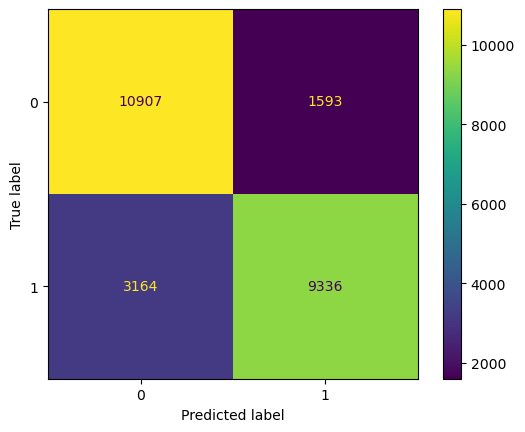

In [19]:
pred_steam = prediction(test_dataset,'text_steam')

In [20]:
print('Accuracy is ' + str(np.mean(pred_steam == test_dataset.label)))
Accuracy.append(str(np.mean(pred_steam == test_dataset.label)))
Names.append('steam')

Accuracy is 0.80972


C:\Users\PION\anaconda3\envs\PYTORCH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


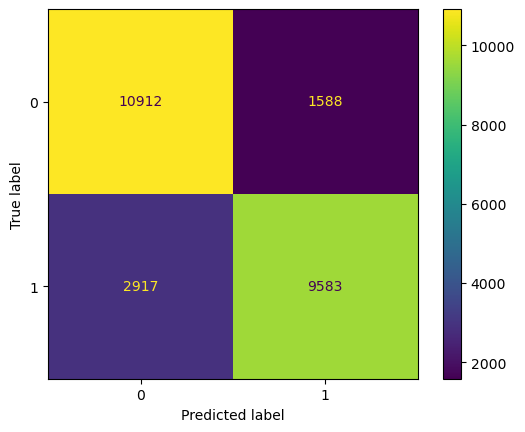

In [21]:
pred_steam_stop_word = prediction(test_dataset,'text_steam_stop_word')

In [22]:
print('Accuracy is ' + str(np.mean(pred_steam_stop_word == test_dataset.label)))
Accuracy.append(str(np.mean(pred_steam_stop_word == test_dataset.label)))
Names.append('no_stop_steam')

Accuracy is 0.8198


In [52]:
Accuracy,Names

(['0.81728', '0.91284', '0.82712', '0.80972', '0.8198'],
 ['test', 'train', 'no_stop', 'steam', 'no_stop_steam'])